In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_av_train = pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/AV/healthcare/train_data.csv")
df_av_test = pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/AV/healthcare/test_data.csv")

In [6]:
def basic_infos(data):
    print("Dataset shape is: ", data.shape,"\n")
    print("Dataset columns are: ",data.columns,"\n")
    print("Dataset dimensions are:",data.ndim,"\n")
    print("Dataset information is:\n",data.info(),"\n")
    categorical, numerical = [], []
    for i in data.columns:
        if data[i].dtype==object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical datatype columns are: ", [i for i in categorical],"\n")
    print("Numercial datatype columns are: ", [i for i in numerical],"\n")

In [7]:
basic_infos(df_av_train)

Dataset shape is:  (318438, 18) 

Dataset columns are:  Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object') 

Dataset dimensions are: 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_

In [25]:
df_av_train

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


# General Exploration

## Hospital_code

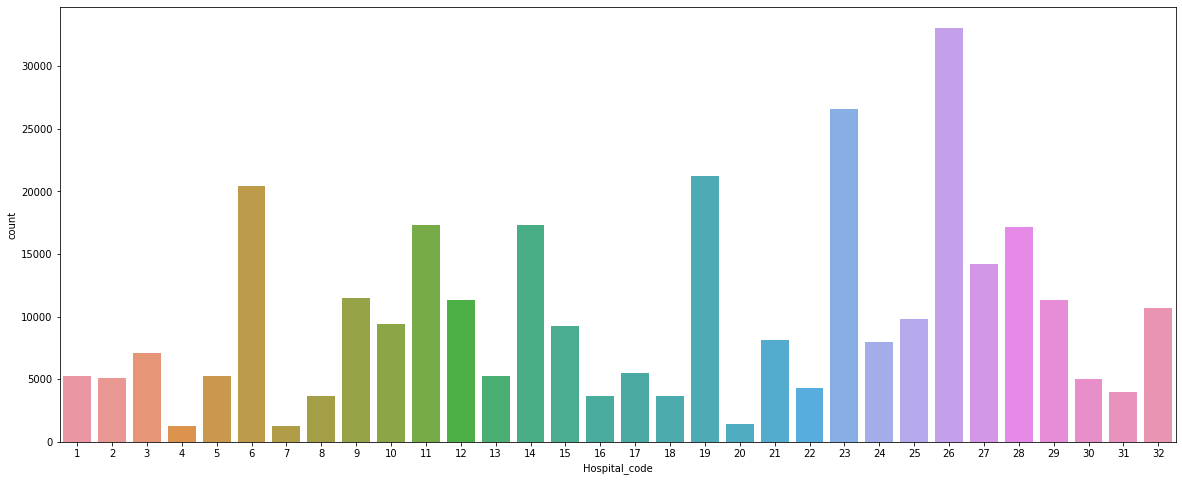

In [11]:
plt.figure(figsize=(20,8))
sns.countplot(df_av_train['Hospital_code'])

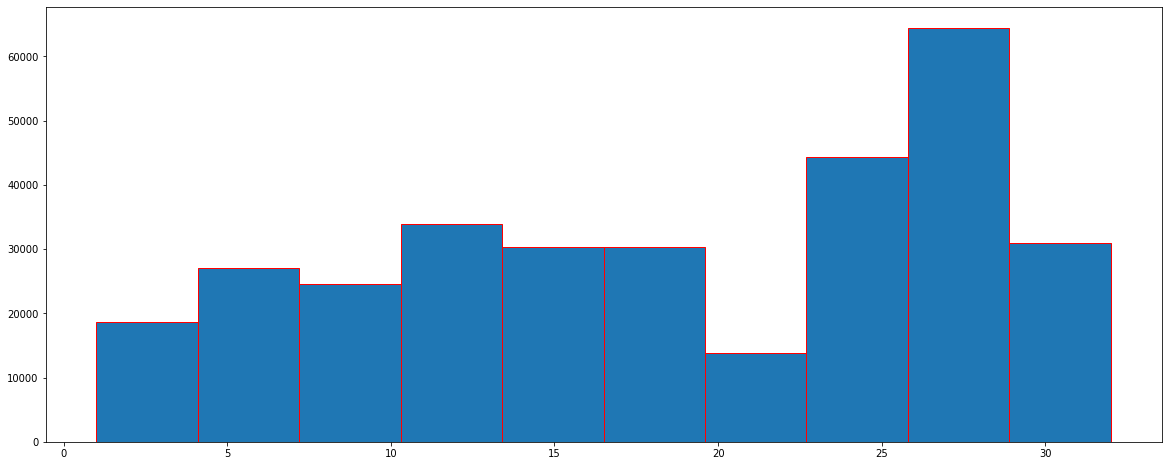

In [14]:
plt.figure(figsize=(20,8))
plt.hist(df_av_train['Hospital_code'], edgecolor='red')
plt.show()

## Hospital_type_code

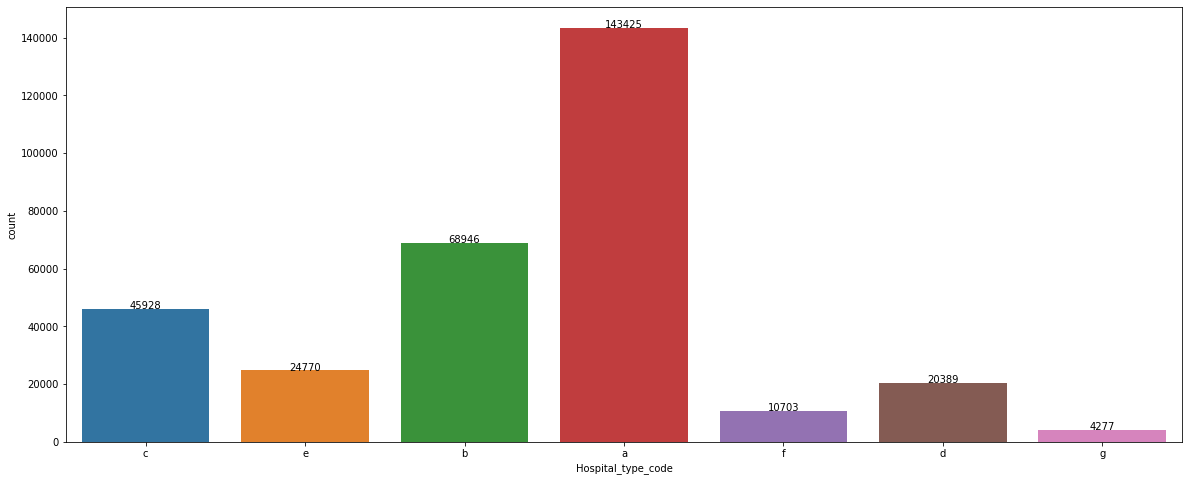

In [15]:
plt.figure(figsize = (20,8))
graph = sns.countplot(df_av_train['Hospital_type_code'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

## City_Code_Hospital

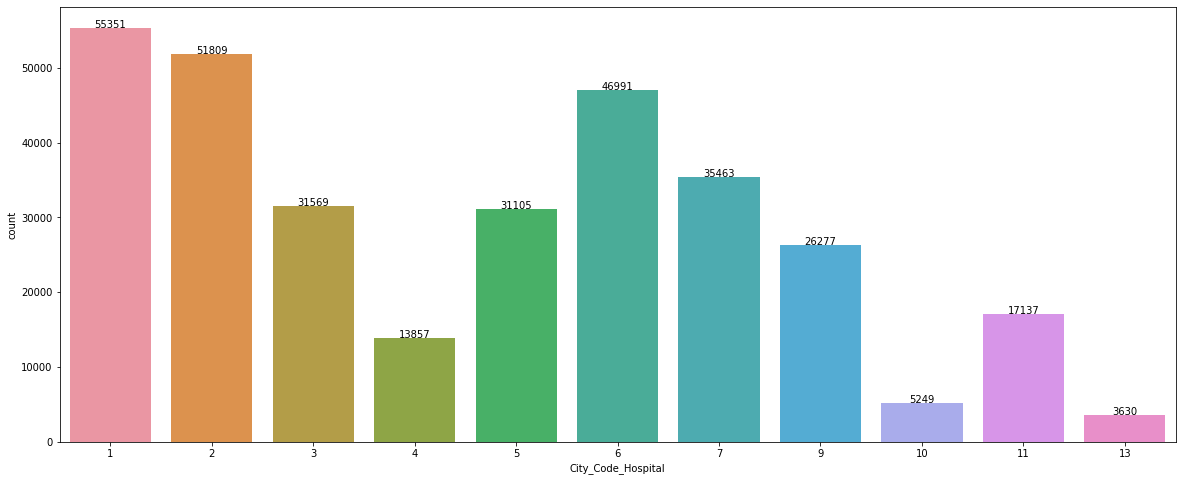

In [16]:
plt.figure(figsize = (20,8))
graph = sns.countplot(df_av_train['City_Code_Hospital'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

## Hospital_region_code

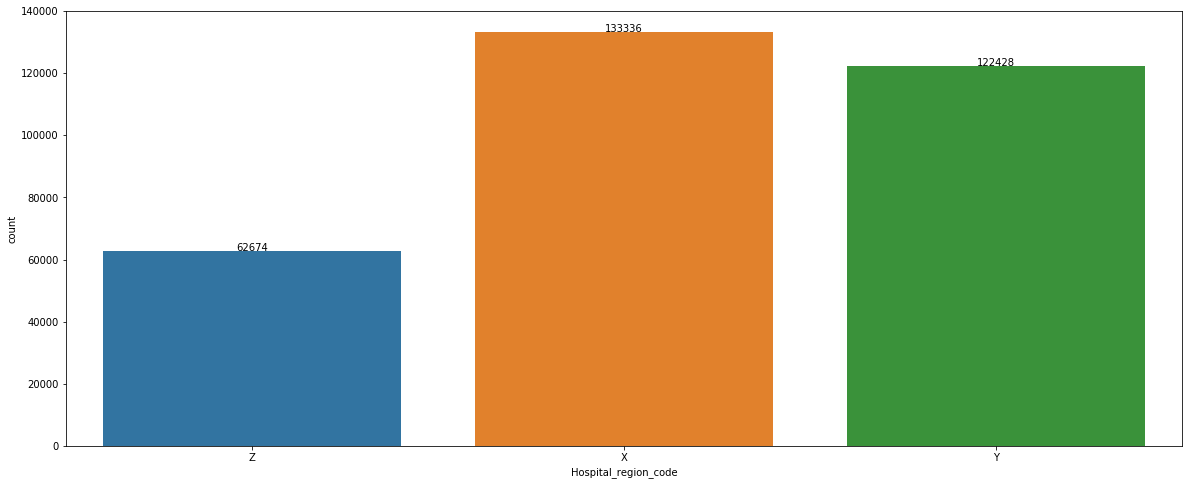

In [17]:
plt.figure(figsize = (20,8))
graph = sns.countplot(df_av_train['Hospital_region_code'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

In [18]:
df_av_train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

## Available Extra Rooms in Hospital

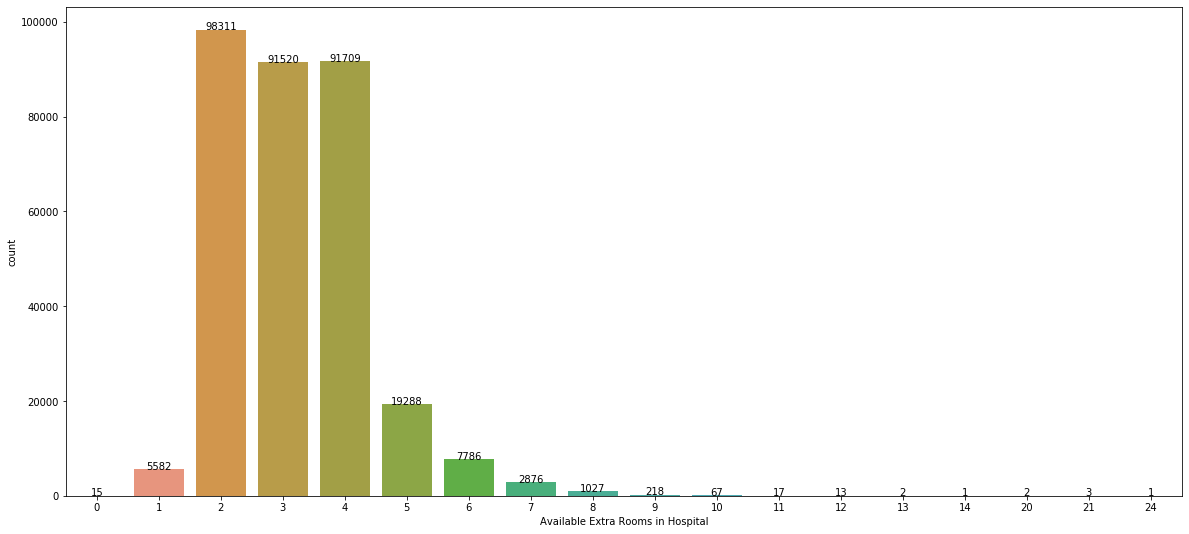

In [19]:
plt.figure(figsize = (20,9))
graph = sns.countplot(df_av_train['Available Extra Rooms in Hospital'])
i=0
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

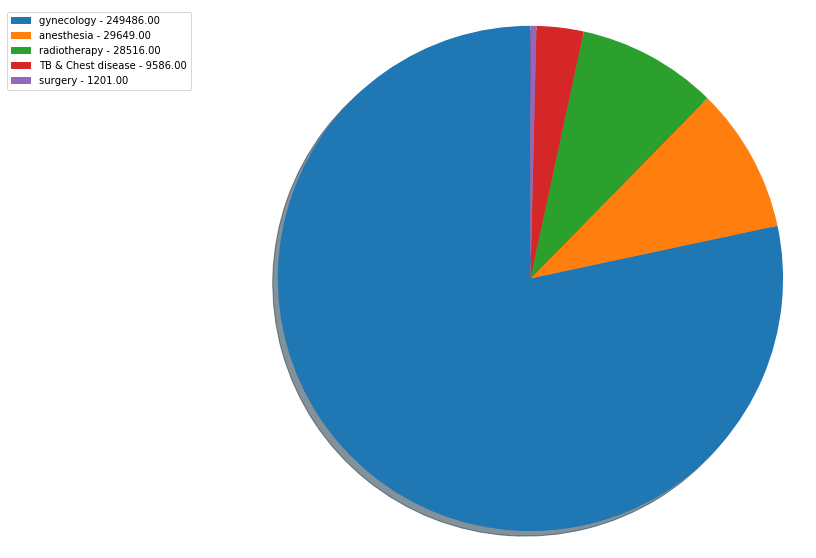

In [24]:
fig, ax = plt.subplots()
plt.rcParams['text.color'] = 'black'
labels = df_av_train['Department'].value_counts().index.to_list()
sizes = df_av_train['Department'].value_counts()
patches, texts = ax.pie(sizes, shadow = True, startangle= 90)
labels = ['{0} - {1:1.2f}'.format(i,j) for i, j in zip(labels, sizes)]
sort_legend = False
plt.legend(patches, labels, loc = 'best', bbox_to_anchor=(-0.1, 1.), fontsize = 10)
ax.axis('equal')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## Ward_Type	

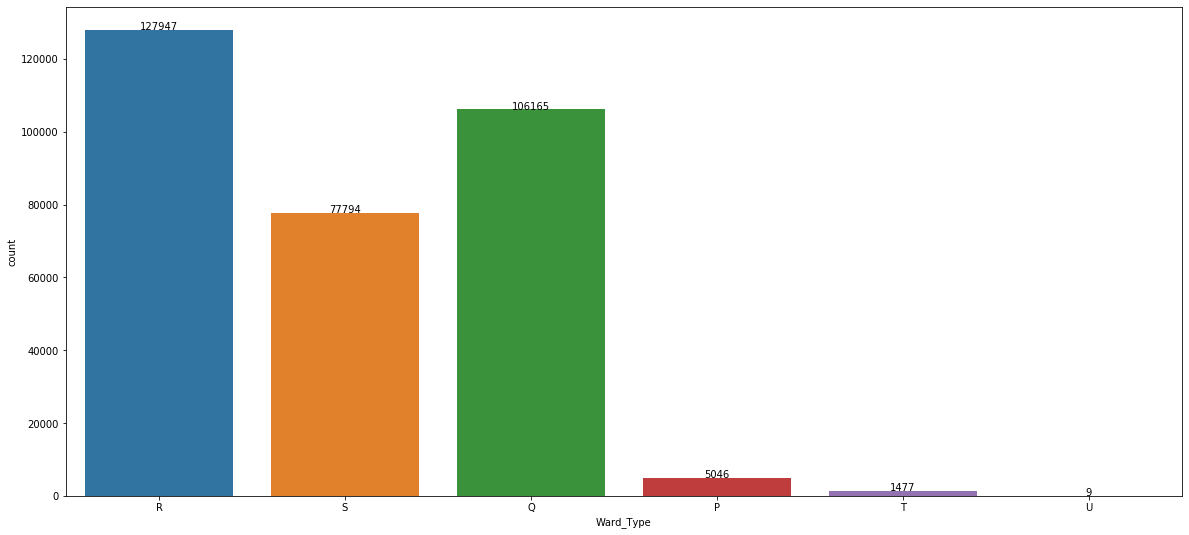

In [26]:
plt.figure(figsize = (20,9))
graph = sns.countplot(df_av_train['Ward_Type'])
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

## Ward_Facility_Code

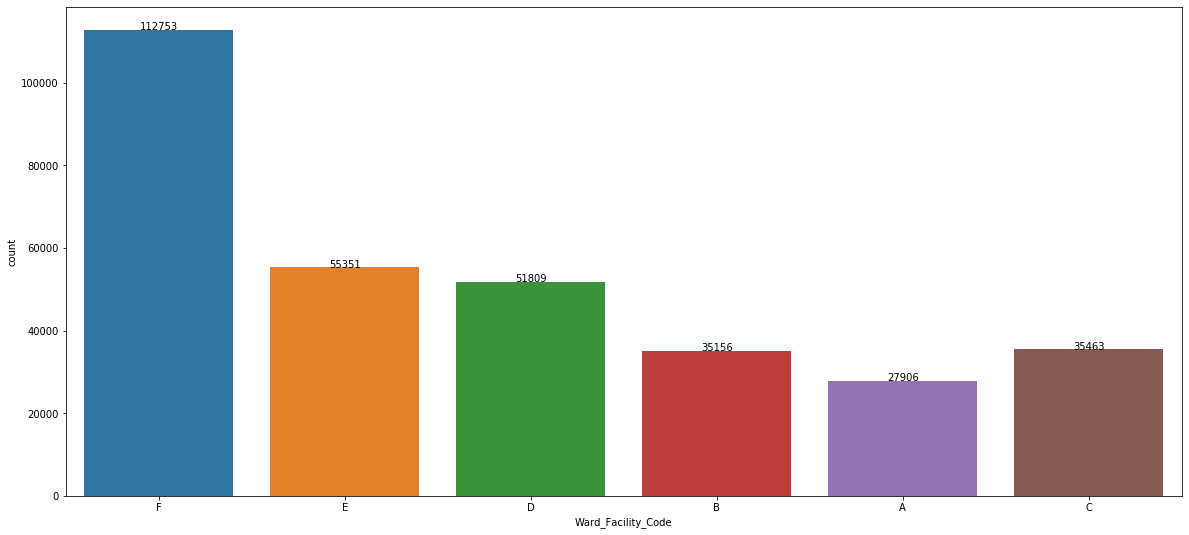

In [27]:
plt.figure(figsize = (20,9))
graph = sns.countplot(df_av_train['Ward_Facility_Code'])
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()

## Bed Grade

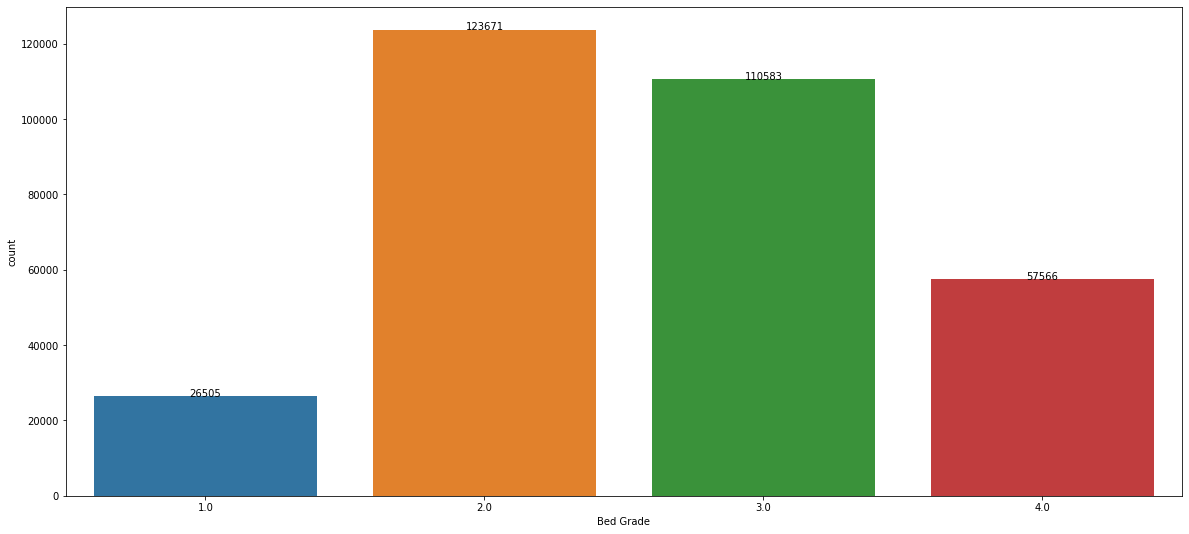

In [29]:
plt.figure(figsize=(20,9))
graph = sns.countplot(df_av_train['Bed Grade'])
for p in graph.patches:
    #print(p)
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        height,ha="center")
    i += 1
#plt.legend()
plt.show()